# Loan Prediction

In [1]:
# prepare useful libraries
install.packages("Amelia") 
install.packages('topicmodels')
library(Amelia)
library(mlbench)
library(corrplot)
library(topicmodels)
library(caret)
library(ROCR)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
corrplot 0.90 loaded
Loading required package: lattice
Loading required package: ggplot2


In [3]:
# read data
bank =read.csv("/home/khadija/Downloads/PS3.csv",header =TRUE, sep =",",stringsAsFactors = FALSE)


In [4]:
# data characteristics
dim(bank)
head(bank)

[1] 329   5

pastdue,cbscore,debt,grossinc,loanamt
0,711,99,717.00,500
0,752,79,2417.00,500
1,654,63,3333.33,6547
0,650,62,2125.00,1200
0,605,57,2249.50,10000
1,774,56,4956.99,16000


We have read the data into r data frame.
The data consists of 329 rows and 5 features, and here is the first 5 observations of the data.

In [5]:
summary(bank)

    pastdue          cbscore           debt          grossinc   
 Min.   :0.0000   Min.   :508.0   Min.   : 0.00   Min.   : 509  
 1st Qu.:0.0000   1st Qu.:657.0   1st Qu.:19.00   1st Qu.:2247  
 Median :0.0000   Median :696.0   Median :27.00   Median :3033  
 Mean   :0.4286   Mean   :692.7   Mean   :26.78   Mean   :3330  
 3rd Qu.:1.0000   3rd Qu.:726.0   3rd Qu.:35.00   3rd Qu.:4333  
 Max.   :1.0000   Max.   :804.0   Max.   :99.00   Max.   :8292  
    loanamt     
 Min.   :  200  
 1st Qu.: 2500  
 Median : 5000  
 Mean   : 5950  
 3rd Qu.:10000  
 Max.   :20000  

[1] 0

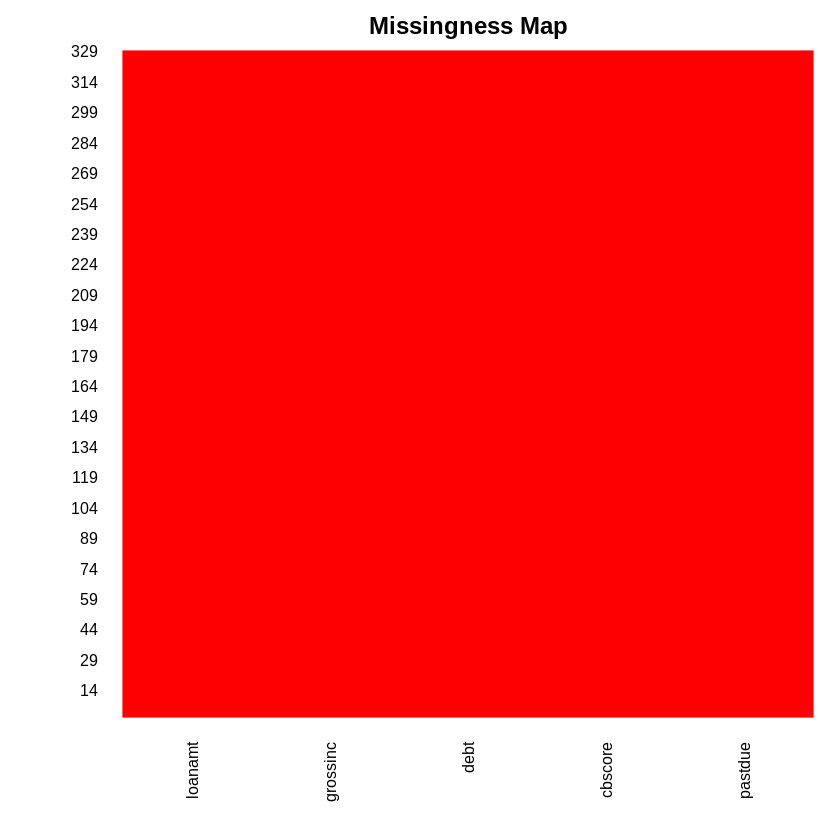

In [7]:
sum(is.na(bank))
missmap(bank, col=c("blue", "red"), legend=FALSE)

Data has no missing values.

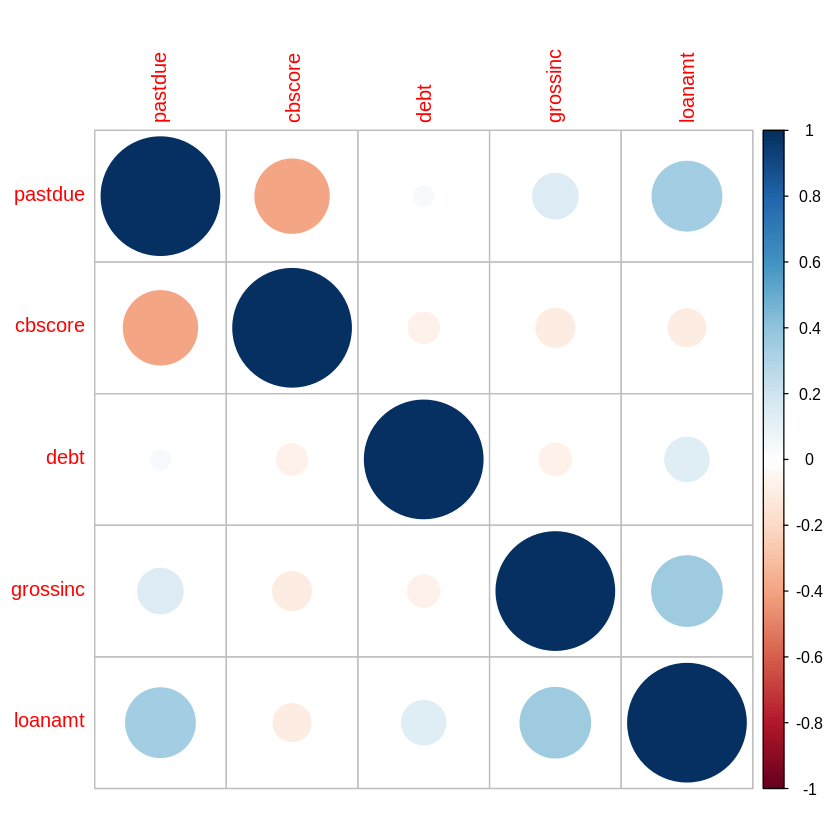

In [9]:
# data visualization
correlations <- cor(bank)
corrplot(correlations, method="circle")


A dot-representation was used where blue represents positive correlation and red negative. The larger the dot the larger the correlation.
We can see that the loan amount has a weak positive correlation with past-due and Gross monthly income, and Score generated by the CSC has a weak negative correlation between past-due.

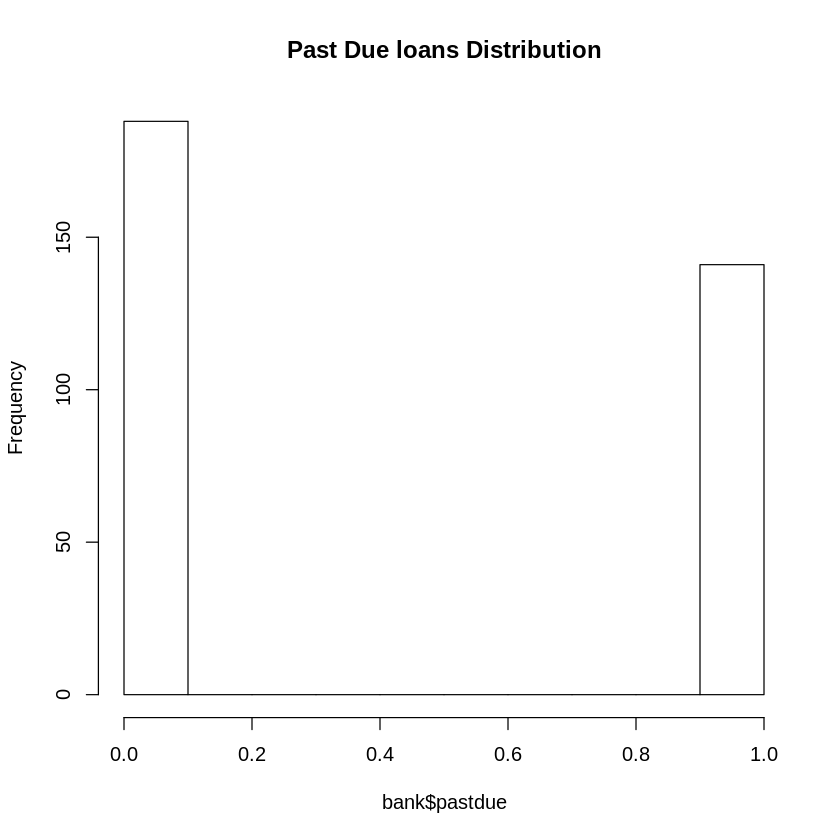

In [13]:
hist(bank$pastdue, main = "Past Due loans Distribution")

It’s seen that the number of non past-due is greater than the past due loans.


## Make Splits



In [14]:
# Make training and test set
train = bank[1:200,]
test=bank[201:329,]

## Logistic Regression

In [15]:
glm.fit <- glm(pastdue ~ ., data=train, family=binomial(link="logit"))
summary(glm.fit)


Call:
glm(formula = pastdue ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9174  -0.8626  -0.4860   0.9187   2.2227  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.293e+00  2.853e+00   2.907 0.003648 ** 
cbscore     -1.307e-02  3.946e-03  -3.312 0.000927 ***
debt        -2.979e-02  1.861e-02  -1.601 0.109382    
grossinc     3.665e-05  1.235e-04   0.297 0.766672    
loanamt      2.234e-04  4.418e-05   5.056 4.29e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 276.28  on 199  degrees of freedom
Residual deviance: 221.43  on 195  degrees of freedom
AIC: 231.43

Number of Fisher Scoring iterations: 4


## Logistic Regression Evaluation

We can see here the standard error is very low for all features used.
It’s seen that all features are significant except debt and grossinc features.
The difference between deviance is not low as it’s more than 100.

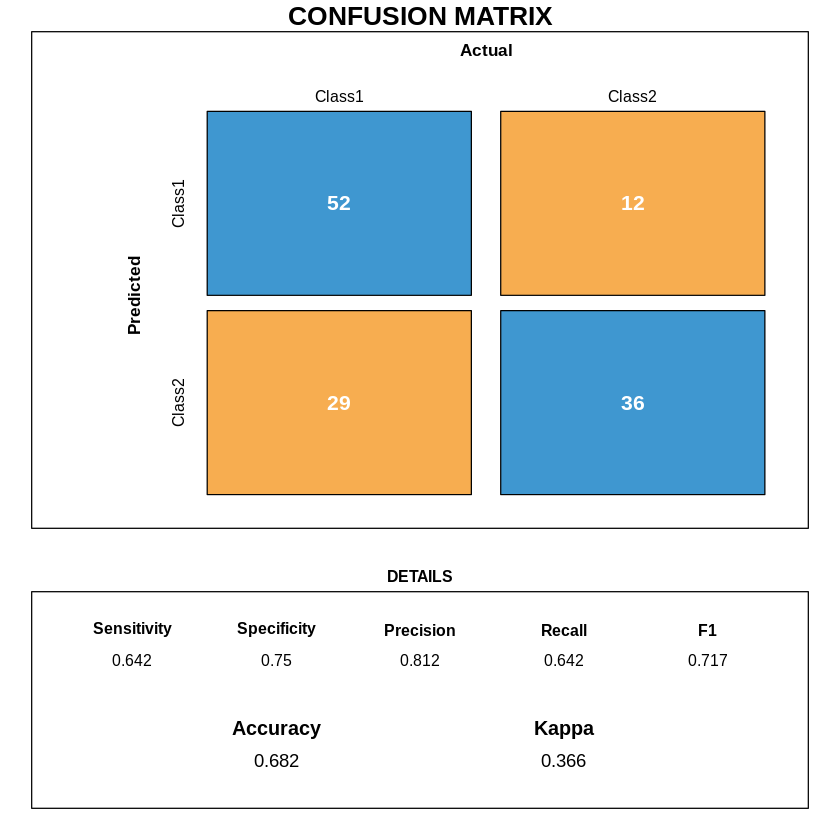

In [16]:
glm.probs <- predict(glm.fit,
                     newdata = test,
                     type = "response")
glm.pred <- ifelse(glm.probs > 0.5, 1, 0)
conf=confusionMatrix(table(glm.pred,test$pastdue))
draw_confusion_matrix <- function(cm) {
  
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)
  
  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)
  
  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')
  
  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)
  
  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}
draw_confusion_matrix(conf)

Here is the confusion matrix of the logistic regression model.
The false positive for past-due is 12 observations and for non past-due loan is 30 observations.
The model accuracy is 0.76.


## LDA

In [17]:
library(MASS)
lda = lda(pastdue ~ ., data = train)
# print the lda.fit object
lda

Call:
lda(pastdue ~ ., data = train)

Prior probabilities of groups:
    0     1 
0.535 0.465 

Group means:
   cbscore     debt grossinc  loanamt
0 701.3738 36.07477 3028.900 4837.554
1 676.7849 33.35484 3579.633 8625.184

Coefficients of linear discriminants:
                   LD1
cbscore  -1.112225e-02
debt     -2.168952e-02
grossinc  4.080381e-05
loanamt   2.033883e-04

We have fitted a lda object to the train split, and here is the lda object printed.

In [22]:
pred_lda <- predict(lda, test)
prediction=data.frame(original = test$pastdue, pred = pred_lda$class)
head(prediction)

original,pred
0,0
1,0
1,1
0,0
1,1
0,1


We called the prediction function , and here is the difference between the actual values and predicted values for the first 5 observations in the test split.


## LDA Evaluation:

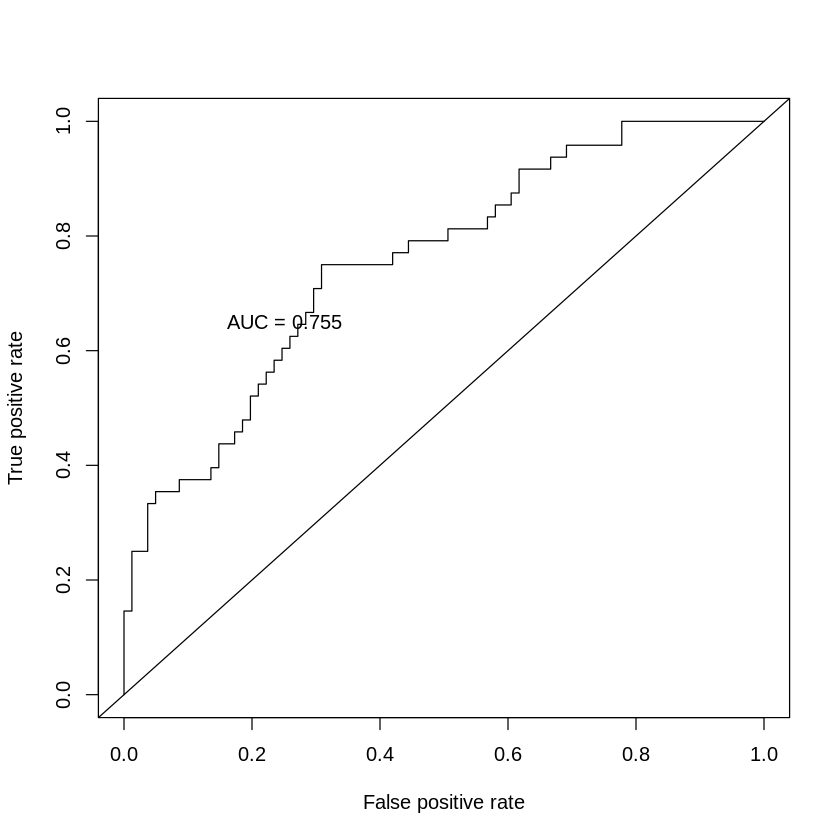

In [23]:
# Get the posteriors as a dataframe.
pred_lda.posteriors <- as.data.frame(pred_lda$posterior)# Evaluate the model
pred <- prediction(pred_lda.posteriors[,2], test$pastdue)
roc.perf = performance(pred, measure = "tpr", x.measure = "fpr")
auc.train <- performance(pred, measure = "auc")
auc.train <- auc.train@y.values# Plot
plot(roc.perf)
abline(a=0, b= 1)
text(x = .25, y = .65 ,paste("AUC = ", round(auc.train[[1]],3), sep = ""))

the lda model resulted in an area under the curve of 0.775 which is fair.
An AUC of 0.75 means that if we take two data points from two different classes, there is a 75% chance that the model will correctly rank order them, hence the positive class has a greater prediction probability than the negative class.


## Summary

in comparison with the performance of the two algorithms used.
There is no confidence difference between their performance, As the logistic regression metric was 76.7% and the LDA metric was 75.5%.
The logistic regression is slightly better than the LDA algorithm.